#### About

> Residual networks

Residual networks, also known as ResNets, are a deep neural network architecture that solves the vanishing gradient problem that can occur when training deep networks. ResNets implements "skip connections" which allows the network to skip certain layers, allowing the gradients to flow and easing the vanishing gradient problem. Mathematically, let's consider a deep neural network with L layers, denoted by H_l, where l = 1, 2, ..., L denote the layer indices. Each layer takes an input X_l and produces an output Y_l using a set of learned parameters W_l. In a traditional neural network, the output of layer l is calculated as follows:

Y_l = f(W_l * X_l),

where f() is the activation function and * represents the matrix multiplication operation.

ResNet introduced skip connections to allow the network to bypass certain layers. The remaining block is the basic element of ResNet, defined as:

Y_l = f(W_l * X_l + X_l),

Where X_l is the input of layer l and Y_l is the output of layer l. A skip connection allows the input to flow directly to the output and then adds it to the output of a traditional neural network layer (W_l * X_l) to produce Y_l. . ResNets also call this "identity mapping" or "shortcut connection".

ResNets are based on the intuition that adding skip connections allows the network to learn the residual map, the difference between the input and output of a layer. This makes it easier for the network to learn the approximate identity mapping, which is often easier than learning the entire mapping from scratch. In addition, hop connections allow gradients to more easily propagate through the network, easing the vanishing gradient problem and allowing deeper networks to be trained.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from keras.optimizers import Adam

2023-04-22 03:55:19.869762: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 03:55:19.938530: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 03:55:19.939444: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 03:55:21.289734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convert class labels to one-hot vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [8]:

# Define ResNet block
def resnet_block(inputs, filters, strides=(1, 1)):
    # Shortcut connection
    shortcut = inputs

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Add shortcut connection
    if strides != (1, 1) or filters != inputs.shape[-1]:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [9]:
# Define ResNet model
def resnet_model():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, strides=(2, 2))
    x = resnet_block(x, 128)
    x = resnet_block(x, 256, strides=(2, 2))
    x = resnet_block(x, 256)
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    return model

In [10]:
# Create ResNet model
model = resnet_model()


In [11]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=1, validation_split=0.1)


352/352 [==============================] - 478s 1s/step - loss: 1.3718 - accuracy: 0.5045 - val_loss: 1.7449 - val_accuracy: 0.3910


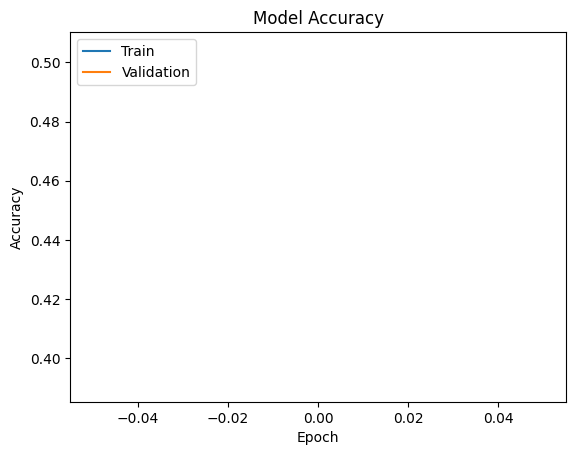

In [16]:
# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


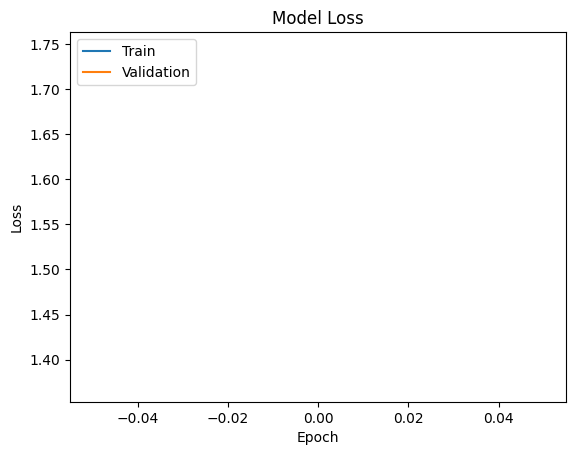

In [17]:
# Plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()